# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

%matplotlib inline

In [2]:
from utils.data_gen import compute_bayes_risk_binary, compute_bayes_risk_binary_label_shift,\
    generate_2d_example

from utils.concentrations import hoeffding_ci_lower_limit,hoeffding_ci_upper_limit

from utils.concentrations import pm_bernstein_ci_lower_limit,pm_bernstein_ci_upper_limit


from utils.concentrations import pm_bernstein_lower_limit, pm_bernstein_upper_limit
from utils.concentrations import pm_hoeffding_upper_limit, pm_hoeffding_lower_limit

In [3]:
sns.set(style="whitegrid",
        font_scale=1.4,
        rc={
            "lines.linewidth": 2,
#             "axes.facecolor": ".9",
            'figure.figsize': (12, 6)
        })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

In [4]:
legend_dict = ['$\{0\}$', '$\{1\}$']
clr1 =  np.array([193, 142, 206]) / 256
clr2 = np.array([125, 225, 125]) / 256
colors = [clr1,clr2]

In [5]:
%load_ext autoreload
%autoreload 2

# Some sanity checks

In [7]:
### trying out capital growth

In [143]:
true_mean = 0.7
n=50
delta=0.1

seq = np.random.binomial(n=1,p=true_mean, size=n)

In [144]:
seq = np.random.binomial(n=1,p=true_mean, size=n)

In [137]:
cand_mean_1=0.5
cand_mean_2=0.6
cand_mean_3=0.7
cand_mean_4=0.8
c=1/2

In [11]:
from utils.concentrations import update_running_mean,update_running_var

In [20]:
# compute running means and variances

run_means = [1/2]
run_vars = [1/4]

obs_enum = np.arange(n) + 1

for i in range(n):
    run_means += [update_running_mean(seq[i],
                                      obs_enum[i], prev_mean_val=run_means[-1])]

for i in range(n):
    # account for the zero's entry in a list
    run_vars += [update_running_var(seq[i], run_means[i+1],
                                    obs_enum[i], prev_var_val=run_vars[-1])]

# compute values of pred mixture
pred_mixtrure_plus = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean) for cur_var in run_vars[:-1]])

pred_mixtrure_minus = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/(1-cand_mean)) for cur_var in run_vars[:-1]])

In [ ]:
# compute values of pred mixture
pred_mixtrure_plus_1 = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean_1) for cur_var in run_vars[:-1]])

In [31]:
# compute values of pred mixture
pred_mixtrure_plus_1 = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean_1) for cur_var in run_vars[:-1]])

pred_mixtrure_plus_2 = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean_2) for cur_var in run_vars[:-1]])

pred_mixtrure_plus_3 = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean_3) for cur_var in run_vars[:-1]])

pred_mixtrure_plus_4 = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean_4) for cur_var in run_vars[:-1]])

In [32]:
bets_plus_1 = 1+ pred_mixtrure_plus_1*(seq-cand_mean_1)

bets_plus_2 = 1+ pred_mixtrure_plus_2*(seq-cand_mean_2)

bets_plus_3 = 1+ pred_mixtrure_plus_3*(seq-cand_mean_3)

bets_plus_4 = 1+ pred_mixtrure_plus_4*(seq-cand_mean_4)

In [23]:
bets_plus = 1+ pred_mixtrure_plus*(seq-cand_mean)
bets_minus = 1- pred_mixtrure_plus*(seq-cand_mean)

In [33]:
capital_plus_1 = np.cumprod(bets_plus_1)
capital_plus_2 = np.cumprod(bets_plus_2)
capital_plus_3 = np.cumprod(bets_plus_3)
capital_plus_4 = np.cumprod(bets_plus_4)

In [24]:
capital_plus = np.cumprod(bets_plus)
capital_minus = np.cumprod(bets_minus)

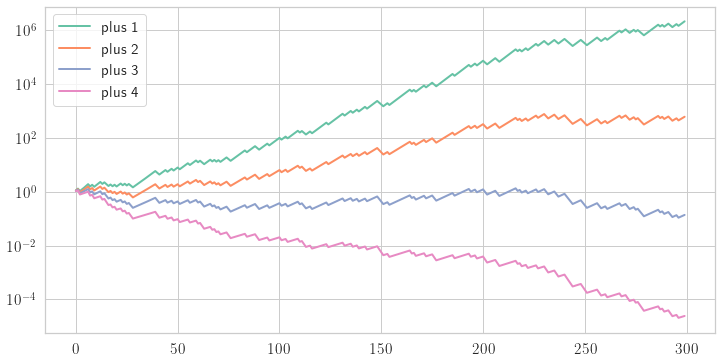

In [35]:
plt.plot(capital_plus_1,label='plus 1')
plt.plot(capital_plus_2,label='plus 2')
plt.plot(capital_plus_3,label='plus 3')
plt.plot(capital_plus_4,label='plus 4')
plt.yscale('log')
plt.legend()

In [117]:
m_start=0.4
thrsd = 1/delta

In [118]:
run_means = [1/2]
run_vars = [1/4]

obs_enum = np.arange(n) + 1

for i in range(n):
    run_means += [update_running_mean(seq[i],
                                      obs_enum[i], prev_mean_val=run_means[-1])]

for i in range(n):
    # account for the zero's entry in a list
    run_vars += [update_running_var(seq[i], run_means[i+1],
                                    obs_enum[i], prev_var_val=run_vars[-1])]

# compute values of pred mixture
pred_mixtrure_plus = np.array(
    [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/(m_start)) for cur_var in run_vars[:-1]])

In [119]:
bets_plus = 1+ pred_mixtrure_plus*(seq-m_start)

capital_plus = np.cumprod(bets_plus)

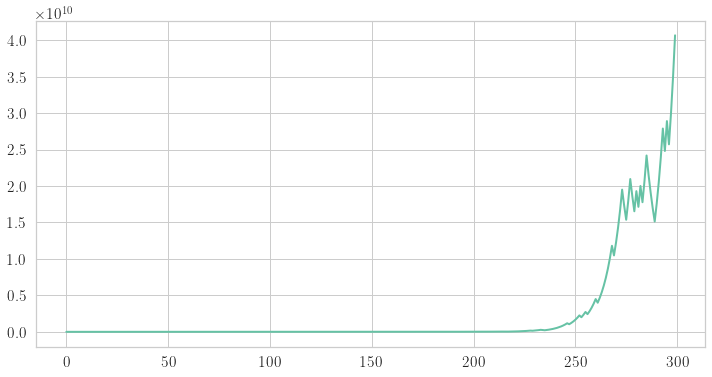

In [120]:
plt.plot(capital_plus)

In [43]:
#take running intersections
inters_lower_lims = [max(capital_plus[:i+1]) for i in range(n)]

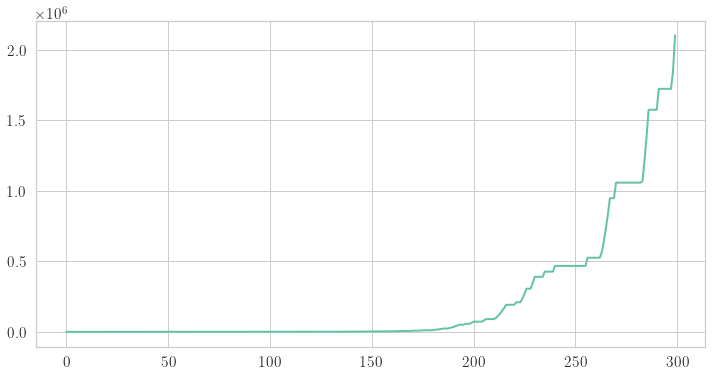

In [45]:
plt.plot(inters_lower_lims)

# Sanity checks

In [8]:
true_mean = 0.85
n=75
delta=0.1

seq = np.random.binomial(n=1,p=true_mean, size=n)

In [22]:
from utils.concentrations import betting_ci_lower_limit,betting_ci_upper_limit,compute_log_capital_plus_mart

In [ ]:
    n = len(seq)

    run_means = [1/2]
    run_vars = [1/4]

    obs_enum = np.arange(n) + 1

    for i in range(n):
        run_means += [update_running_mean(seq[i],
                                          obs_enum[i], prev_mean_val=run_means[-1])]

    for i in range(n):
        # account for the zero's entry in a list
        run_vars += [update_running_var(seq[i], run_means[i+1],
                                        obs_enum[i], prev_var_val=run_vars[-1])]

    # compute values of pred mixture
    pred_mixtrure_plus = np.array(
        [min(np.sqrt(2*np.log(1/delta)/(n*cur_var)), c/cand_mean) for cur_var in run_vars[:-1]])

    bets_plus = 1 + pred_mixtrure_plus*(seq-cand_mean)

    log_bets = np.log(bets_plus)

    capital_plus = np.cumsum(log_bets)

In [15]:
compute_log_capital_plus_mart(seq[:1], 0.5,0.025)

0.4054651081081644

In [23]:
def betting_ci_lower_limit_2(seq, delta, delta_tol=1e-5, take_run_inter=True):
    """
    Perform bisection step in order to approximate L_bet

    Parameters
    ----------
        seq: array_like
            the original sequece of observations

        delta_tol:
            tolerance level for approximation quality

    Returns
    -------  


    """

    #store cand lower bounds
    cand_lower_bounds = list()
    
    
    n = len(seq)
    
    for cur_substring_length in range(n):
        # specify endpoints
        m_right = 1-1e-5
        # to avoid numerical issues use some small m_low
        m_left = 1e-5
    
        # compute value of the martingale at the endpoints
        mart_left_val = compute_log_capital_plus_mart(seq[:cur_substring_length+1], m_left, delta)
        mart_right_val = compute_log_capital_plus_mart(seq[:cur_substring_length+1], m_right, delta)

        if mart_right_val > np.log(1/delta):
            raise ValueError('issue with the right endpoint')

        # iterate line search
        m_cand = 0.5
        mart_cand_value = compute_log_capital_plus_mart(seq[:cur_substring_length+1], m_cand, delta)
        while abs(m_cand-m_right) > delta_tol:
            # print('Left: '+str(m_left)+' Cand: ' +
            #       str(m_cand)+' Right: '+str(m_right))
            if mart_cand_value < np.log(1/delta):
                m_right = m_cand
                mart_right_val = mart_cand_value
                m_cand = (m_left+m_cand)/2
                mart_cand_value = compute_log_capital_plus_mart(seq[:cur_substring_length+1], m_cand, delta)
            else:
                m_left = m_cand
                mart_left_val = mart_cand_value
                m_cand = (m_right+m_cand)/2
                mart_cand_value = compute_log_capital_plus_mart(seq[:cur_substring_length+1], m_cand, delta)
        cand_lower_bounds+=[m_cand]
    return max(cand_lower_bounds)

In [30]:
mart_left_val = np.zeros(shape=100)

In [31]:
mart_left_val

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
np.argmin(np.linspace(0,1)<0.5)

25

In [67]:
np.argmax(np.linspace(1,0)<0.5)

25

In [79]:
np.argmin([1,1,1])

0

In [96]:
betting_ci_upper_limit(seq, 0.025)

0.924614623115578

In [98]:
betting_ci_lower_limit(seq, 0.025)

0.7185885929648241

In [99]:
from utils.concentrations import betting_cs_lower_limit,betting_cs_upper_limit

In [102]:
betting_cs_lower_limit(seq, 0.025)

0.7185885929648241

In [103]:
betting_cs_upper_limit(seq, 0.025)

0.924614623115578

# Betting vs Bernstein

In [238]:
true_mean = 0.9
n=100
delta=0.1

# seq = np.random.binomial(n=1,p=true_mean, size=n)
seq = np.random.beta(a=10,b=30,size=n)

In [239]:
from utils.concentrations import pm_bernstein_upper_limit,pm_bernstein_lower_limit

In [240]:
ber_cs_lower = pm_bernstein_lower_limit(seq, 0.025, last_step_only=False)
bet_cs_lower = betting_cs_lower_limit(seq, 0.025, last_step_only=False)
ber_cs_upper = pm_bernstein_upper_limit(seq, 0.025, last_step_only=False)
bet_cs_upper = betting_cs_upper_limit(seq, 0.025, last_step_only=False)

In [241]:
np.argmax([1,1,1,1])

0

In [242]:
betting_ci_upper_limit(seq, 0.025)-betting_ci_lower_limit(seq, 0.025)

0.070350351758794

In [243]:
pm_bernstein_ci_upper_limit(seq, 0.025)-pm_bernstein_ci_lower_limit(seq, 0.025)

0.15134596551577306

(0.0, 1.0)

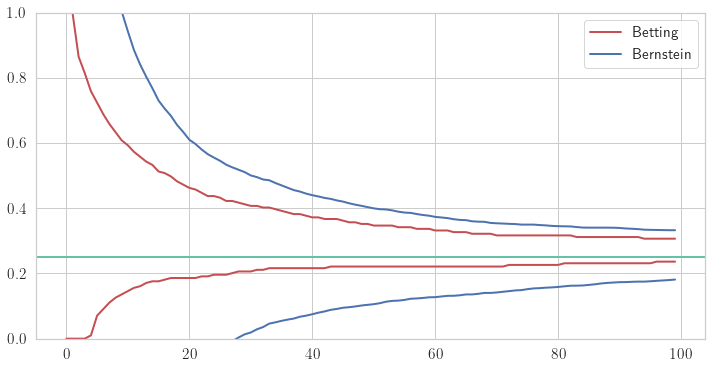

In [244]:
plt.plot(bet_cs_lower, label='Betting', c='r')
plt.plot(ber_cs_lower, label='Bernstein',c='b')
plt.plot(bet_cs_upper, c='r')
plt.plot(ber_cs_upper, c='b')
plt.axhline(y=0.25)
plt.legend()
plt.ylim([0,1])

In [203]:
np.minimum(seq, 0.15)

array([0.14578716, 0.12977339, 0.15      , 0.15      , 0.12736267,
       0.15      , 0.15      , 0.15      , 0.15      , 0.15      ,
       0.15      , 0.15      , 0.15      , 0.15      , 0.15      ,
       0.15      , 0.15      , 0.15      , 0.15      , 0.15      ,
       0.15      , 0.12979615, 0.15      , 0.15      , 0.15      ,
       0.15      , 0.15      , 0.09274393, 0.15      , 0.13722387,
       0.15      , 0.15      , 0.15      , 0.15      , 0.1311767 ,
       0.15      , 0.15      , 0.15      , 0.1247178 , 0.15      ,
       0.15      , 0.15      , 0.15      , 0.15      , 0.15      ,
       0.15      , 0.15      , 0.15      , 0.15      , 0.15      ])

In [89]:

mart_vals=[0,1,1]

In [90]:
b = mart_vals[::-1]
i = len(b) - np.argmax(b) - 1
print(i)

2


In [65]:
np.linspace(0,1)<0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [38]:
np.linspace(0,1)<0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [63]:
betting_ci_lower_limit(seq, 0.025, delta_tol=1e-5)

0.7185885929648241

In [28]:
betting_ci_lower_limit_2(seq, 0.025, delta_tol=1e-5)

0.7185396354675291

In [49]:
np.log(1/0.025)

3.6888794541139363

In [177]:
bisection_step_plus(seq, delta_tol=0.0001, delta=0.025)

Left: 1e-05 Cand: 0.5 Right: 0.99999
Left: 0.5 Cand: 0.749995 Right: 0.99999
Left: 0.749995 Cand: 0.8749925000000001 Right: 0.99999
Left: 0.749995 Cand: 0.81249375 Right: 0.8749925000000001
Left: 0.749995 Cand: 0.781244375 Right: 0.81249375
Left: 0.781244375 Cand: 0.7968690625 Right: 0.81249375
Left: 0.7968690625 Cand: 0.8046814062500001 Right: 0.81249375
Left: 0.7968690625 Cand: 0.8007752343750001 Right: 0.8046814062500001
Left: 0.7968690625 Cand: 0.7988221484375 Right: 0.8007752343750001
Left: 0.7988221484375 Cand: 0.79979869140625 Right: 0.8007752343750001
Left: 0.79979869140625 Cand: 0.8002869628906251 Right: 0.8007752343750001
Left: 0.8002869628906251 Cand: 0.8005310986328126 Right: 0.8007752343750001
Left: 0.8002869628906251 Cand: 0.8004090307617189 Right: 0.8005310986328126


In [178]:
bisection_step_minus(seq, delta_tol=0.0001, delta=0.025)

Left: 1e-05 Cand: 0.5 Right: 0.99999
Left: 0.5 Cand: 0.749995 Right: 0.99999
Left: 0.749995 Cand: 0.8749925000000001 Right: 0.99999
Left: 0.8749925000000001 Cand: 0.9374912500000001 Right: 0.99999
Left: 0.9374912500000001 Cand: 0.9687406250000001 Right: 0.99999
Left: 0.9374912500000001 Cand: 0.9531159375000001 Right: 0.9687406250000001
Left: 0.9531159375000001 Cand: 0.9609282812500002 Right: 0.9687406250000001
Left: 0.9531159375000001 Cand: 0.9570221093750002 Right: 0.9609282812500002
Left: 0.9570221093750002 Cand: 0.9589751953125002 Right: 0.9609282812500002
Left: 0.9570221093750002 Cand: 0.9579986523437503 Right: 0.9589751953125002
Left: 0.9579986523437503 Cand: 0.9584869238281253 Right: 0.9589751953125002
Left: 0.9579986523437503 Cand: 0.9582427880859378 Right: 0.9584869238281253
Left: 0.9582427880859378 Cand: 0.9583648559570315 Right: 0.9584869238281253


In [179]:
from utils.concentrations import pm_bernstein_ci_lower_limit,pm_bernstein_ci_upper_limit

In [180]:
pm_bernstein_ci_upper_limit(seq,delta=0.025)

1.0231663812049199

In [181]:
pm_bernstein_ci_lower_limit(seq,delta=0.025)

0.8025069796040328

In [ ]:
if inters_lower_lims[-1]<thrsd: 
    m_prev = m_start
    m_start = m_prev

In [ ]:
capital_plus

In [29]:
np.log(bets_minus)

array([-0.13227208, -0.17045528,  0.16884781, -0.15656184, -0.16592151,
       -0.17607682, -0.18635288,  0.16417025, -0.16540735,  0.14619501,
       -0.1564155 , -0.16033034, -0.16439215,  0.14418389, -0.15710167,
        0.13803579,  0.13230789, -0.14760007,  0.1299642 , -0.14568491,
        0.12825579, -0.14423001, -0.14545247,  0.12796606, -0.14411044,
        0.12679307, -0.14303326,  0.1258513 ,  0.12443521, -0.14075241,
       -0.14141428, -0.14215226, -0.14295386, -0.1438089 , -0.144709  ,
       -0.14564724, -0.14661781, -0.14761587, -0.14863731, -0.14967864,
        0.13096338,  0.12903616, -0.14605822, -0.14691878, -0.14779666,
        0.12941594, -0.14662723, -0.14744752,  0.12910648, -0.14636549,
       -0.1471353 ,  0.12883043, -0.14612906, -0.14685426, -0.14759   ,
       -0.14833512,  0.12971794, -0.14729326, -0.14799672, -0.14870777,
        0.12997289, -0.14768954,  0.1291683 ,  0.12796583, -0.14536901,
       -0.14595785, -0.14655377,  0.12825319, -0.14577832,  0.12

In [22]:
pred_mixtrure_plus.shape

(300,)

In [21]:
pred_mixtrure_plus

array([0.24779481, 0.3134384 , 0.36787989, 0.28984273, 0.30577456,
       0.32289287, 0.34003868, 0.35682985, 0.30490324, 0.31484374,
       0.28959245, 0.29627532, 0.30318149, 0.310193  , 0.29076566,
       0.29603327, 0.28291942, 0.27444781, 0.27757523, 0.27113993,
       0.27368752, 0.26862279, 0.27073802, 0.27302886, 0.26841574,
       0.27036418, 0.26654952, 0.26822702, 0.26501729, 0.26259126,
       0.26374082, 0.26502168, 0.26641188, 0.26789353, 0.2694519 ,
       0.2710748 , 0.27275204, 0.27447508, 0.27623669, 0.27803076,
       0.27985207, 0.27546252, 0.27178522, 0.2732718 , 0.27478701,
       0.27632686, 0.27276831, 0.27418456, 0.27562255, 0.27231617,
       0.27364564, 0.27499444, 0.27190764, 0.27316039, 0.27443042,
       0.27571571, 0.27701442, 0.27391831, 0.2751321 , 0.27635814,
       0.27759501, 0.27460219, 0.27576323, 0.27302833, 0.27059371,
       0.27161174, 0.27264142, 0.27368161, 0.27130141, 0.27228459,
       0.27008403, 0.27101494, 0.26897401, 0.26985684, 0.27074

## well-separated

In [28]:
mu_1 = np.array([2,0])
mu_0 = np.array([-2,0])

In [29]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 1000)

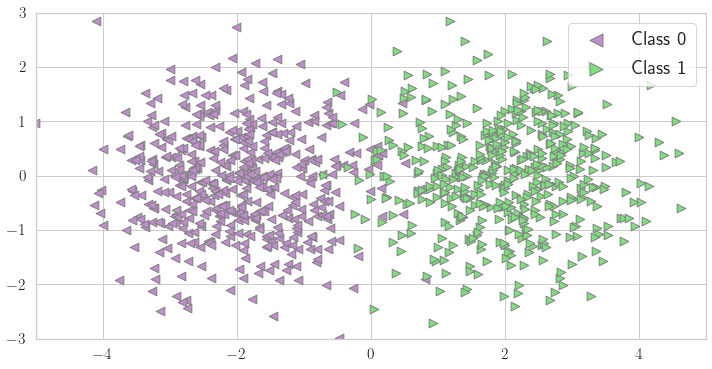

In [30]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            marker='<',
            label= 'Class 0',
            s=75,
            c=colors[0].reshape(1, -1))
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            marker='>',
            label= 'Class 1',
            s=75,
            c=colors[1].reshape(1, -1))
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-5,5])
plt.ylim([-3,3])
plt.show()
# plt.savefig('img/well_sep_data_vis.pdf', bbox_inches='tight')

In [31]:
prob_class_1 = np.linspace(0.1,0.9,20)

In [32]:
risks_source_separable = list()
risks_target_separable_25 = list()
risks_target_separable_5 = list()
risks_target_separable_75 = list()

In [33]:
for cur_prob_class_1 in prob_class_1:
    risks_source_separable+=[compute_bayes_risk_binary(cur_prob_class_1,mu_1,mu_0)[0][0]]

for cur_prob_class_1 in prob_class_1:
    risks_target_separable_25 += [
        compute_bayes_risk_binary_label_shift(0.25, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_5 += [
        compute_bayes_risk_binary_label_shift(0.5, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_75 += [
        compute_bayes_risk_binary_label_shift(0.75, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]

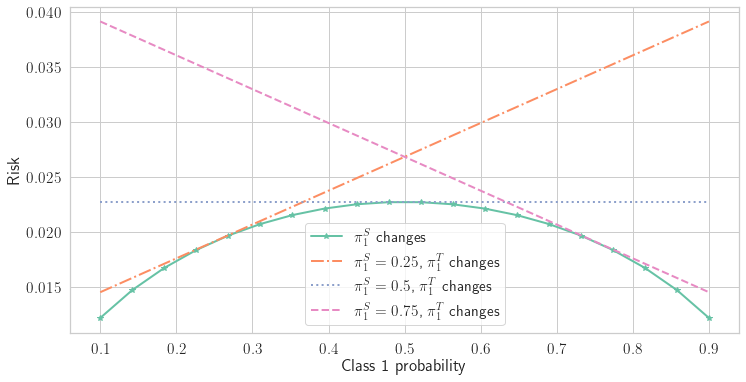

In [34]:
plt.plot(prob_class_1,risks_source_separable, marker='*', label = r'$\pi_1^S$ changes')
plt.plot(prob_class_1,risks_target_separable_25,linestyle='-.', label = r'$\pi^S_1=0.25$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_5,linestyle=':', label = r'$\pi^S_1=0.5$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_75,linestyle='--', label = r'$\pi^S_1=0.75$, $\pi_1^T$ changes')
plt.legend()
plt.xlabel('Class 1 probability')
plt.ylabel('Risk')
# plt.show()
plt.savefig('img/risk_well_separable.pdf', bbox_inches='tight')

## largely-intersecting

In [8]:
mu_1 = np.array([1,0])
mu_0 = np.array([-1,0])
prob_class_1 = np.linspace(0.1,0.9,20)

In [9]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 1000)

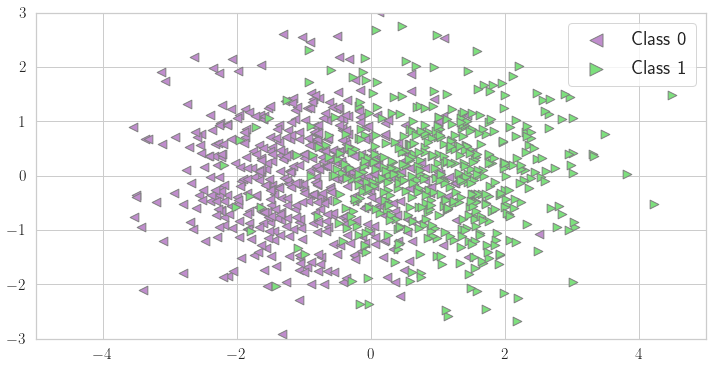

In [37]:
plt.figure(figsize=[12, 6])
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            edgecolor="gray",
            marker='<',
            label= 'Class 0',
            s=75,
            c=colors[0].reshape(1, -1))
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            edgecolor="gray",
            marker='>',
            label= 'Class 1',
            s=75,
            c=colors[1].reshape(1, -1))
plt.legend(loc=1, markerscale=1.5, prop={'size': 20})
plt.xlim([-5,5])
plt.ylim([-3,3])
plt.show()
# plt.savefig('img/not_well_sep_data_vis.pdf', bbox_inches='tight')

In [38]:
prob_class_1 = np.linspace(0.1,0.9,20)

In [39]:
risks_source_separable = list()
risks_target_separable_25 = list()
risks_target_separable_5 = list()
risks_target_separable_75 = list()

In [40]:
for cur_prob_class_1 in prob_class_1:
    risks_source_separable+=[compute_bayes_risk_binary(cur_prob_class_1,mu_1,mu_0)[0][0]]

for cur_prob_class_1 in prob_class_1:
    risks_target_separable_25 += [
        compute_bayes_risk_binary_label_shift(0.25, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_5 += [
        compute_bayes_risk_binary_label_shift(0.5, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]
    
for cur_prob_class_1 in prob_class_1:
    risks_target_separable_75 += [
        compute_bayes_risk_binary_label_shift(0.75, cur_prob_class_1, mu_1,
                                              mu_0)[0][0]
    ]

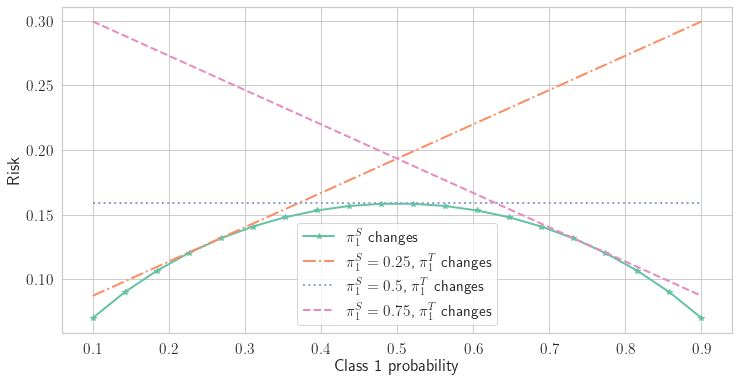

In [41]:
plt.plot(prob_class_1,risks_source_separable, marker='*', label = r'$\pi_1^S$ changes')
plt.plot(prob_class_1,risks_target_separable_25,linestyle='-.', label = r'$\pi^S_1=0.25$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_5,linestyle=':', label = r'$\pi^S_1=0.5$, $\pi_1^T$ changes')
plt.plot(prob_class_1,risks_target_separable_75,linestyle='--', label = r'$\pi^S_1=0.75$, $\pi_1^T$ changes')
plt.legend()
plt.xlabel('Class 1 probability')
plt.ylabel('Risk')
# plt.show()
plt.savefig('img/risk_not_well_separable.pdf', bbox_inches='tight')

# Oracle predictor

In [10]:
from utils.data_gen import LDA_predictor

In [11]:
mu_1 = np.array([1,0])
mu_0 = np.array([-1,0])
prob_class_1 = 0.5
prob_class_0 = 1 - prob_class_1
cov = np.eye(2)

In [123]:
X,y = generate_2d_example(0.5, mu_0, mu_1, 5000)

In [124]:
clf = LDA_predictor()

clf.mean_class_0=mu_0
clf.mean_class_1=mu_1
clf.class_0_prior = prob_class_0
clf.class_1_prior = prob_class_1


In [125]:
clf.score(X,y)

0.8432

In [126]:
compute_bayes_risk_binary_label_shift(0.5, 0.5, mu_1,
                                              mu_0)[0][0]

0.15865525393145707

In [127]:
pred_y = clf.predict(X)
z = pred_y != y

# concentrations

In [128]:
compute_hoeffding_ci_lower_limit(z,0.05)

0.1394918161739802

In [129]:
compute_hoeffding_ci_upper_limit(z,0.05)

0.1741081838260275

In [130]:
compute_pm_bernstein_fixed_time_lower_limit(z,0.05)

0.15745732776196597

In [131]:
compute_pm_bernstein_fixed_time_upper_limit(z,0.05)

0.16956147287656662

In [138]:
low = compute_pm_bernstein_lower_limit(z,0.05)
up = compute_pm_bernstein_upper_limit(z,0.05)

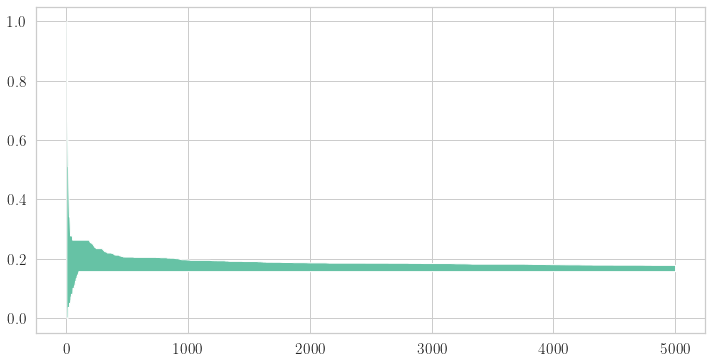

In [139]:
plt.fill_between(x=np.arange(5000),y1=np.maximum(low,0),y2=np.minimum(up,1))

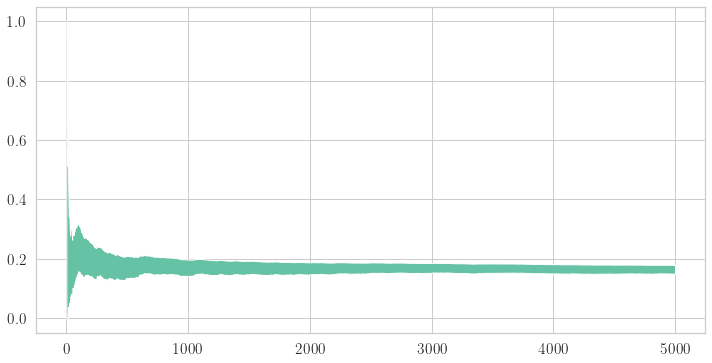

In [136]:
plt.fill_between(x=np.arange(5000),y1=np.maximum(low,0),y2=np.minimum(up,1))

In [141]:
from utils.concentrations import compute_pm_hoeffding_upper_limit, compute_pm_hoeffding_lower_limit

In [152]:
low_h = compute_pm_hoeffding_lower_limit(z,0.05)
up_h = compute_pm_hoeffding_upper_limit(z,0.05)

(0.0, 0.4)

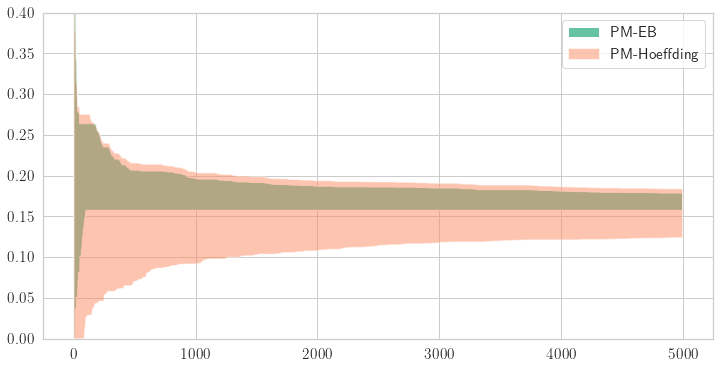

In [157]:
plt.fill_between(x=np.arange(5000),y1=np.maximum(low,0),y2=np.minimum(up,1), label='PM-EB')
plt.fill_between(x=np.arange(5000),y1=np.maximum(low_h,0),y2=np.minimum(up_h,1),alpha=0.5, label='PM-Hoeffding')
plt.legend()
plt.ylim([0,0.4])

# Sanity checks for concentrations

In [75]:
n=1000
p=0.8

In [80]:
seq = np.random.binomial(1,p,size=n)

In [81]:
low = compute_pm_bernstein_lower_limit(seq,0.05, take_run_inter=False)
up = compute_pm_bernstein_upper_limit(seq,0.05, take_run_inter=False)
low_int = compute_pm_bernstein_lower_limit(seq,0.05, take_run_inter=True)
up_int = compute_pm_bernstein_upper_limit(seq,0.05, take_run_inter=True)

In [82]:
low_h = compute_pm_hoeffding_lower_limit(seq,0.05, take_run_inter=False)
up_h = compute_pm_hoeffding_upper_limit(seq,0.05, take_run_inter=False)
low_h_int = compute_pm_hoeffding_lower_limit(seq,0.05, take_run_inter=True)
up_h_int = compute_pm_hoeffding_upper_limit(seq,0.05, take_run_inter=True)

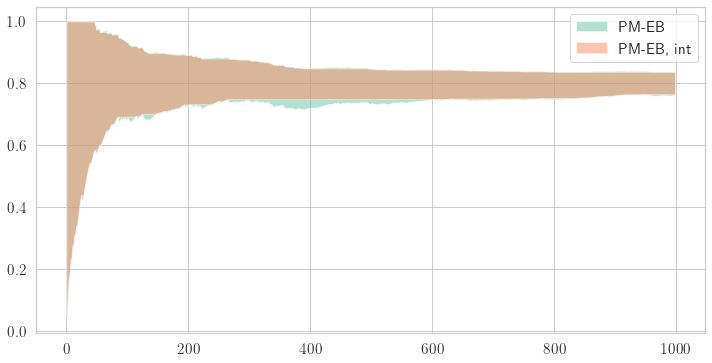

In [83]:
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low, 0),
                 y2=np.minimum(up, 1),
                 alpha=0.5,
                 label='PM-EB')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h,0),y2=np.minimum(up_h,1),alpha=0.5, label='PM-Hoeffding')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_int, 0),
                 y2=np.minimum(up_int, 1),
                 alpha=0.5,
                 label='PM-EB, int')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h_int,0),y2=np.minimum(up_h_int,1),alpha=0.5, label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])

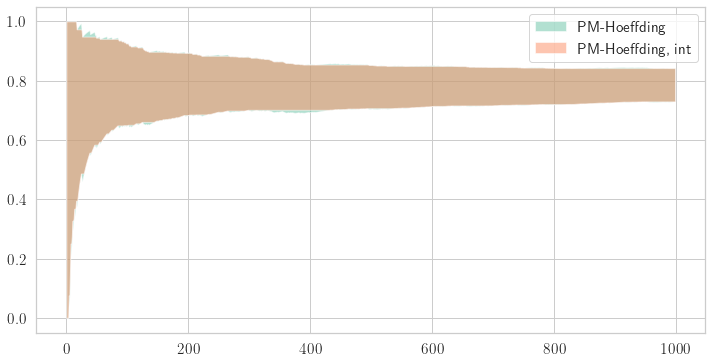

In [84]:
# plt.fill_between(x=np.arange(n),y1=np.maximum(low,0),y2=np.minimum(up,1),alpha=0.5, label='PM-EB')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h, 0),
                 y2=np.minimum(up_h, 1),
                 alpha=0.5,
                 label='PM-Hoeffding')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_int,0),y2=np.minimum(up_int,1),alpha=0.5, label='PM-EB, int')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h_int, 0),
                 y2=np.minimum(up_h_int, 1),
                 alpha=0.5,
                 label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])

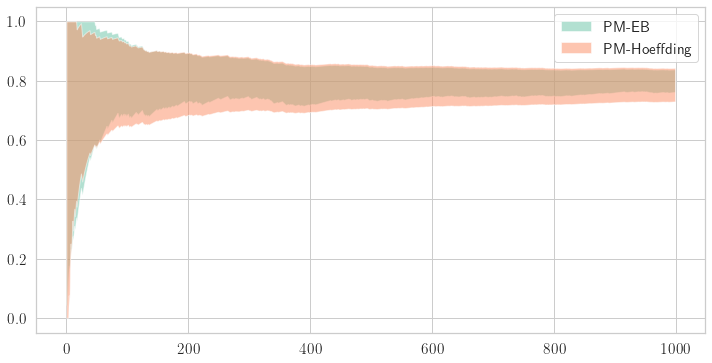

In [85]:
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low, 0),
                 y2=np.minimum(up, 1),
                 alpha=0.5,
                 label='PM-EB')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h, 0),
                 y2=np.minimum(up_h, 1),
                 alpha=0.5,
                 label='PM-Hoeffding')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_int,0),y2=np.minimum(up_int,1),alpha=0.5, label='PM-EB, int')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h_int,0),y2=np.minimum(up_h_int,1),alpha=0.5, label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])

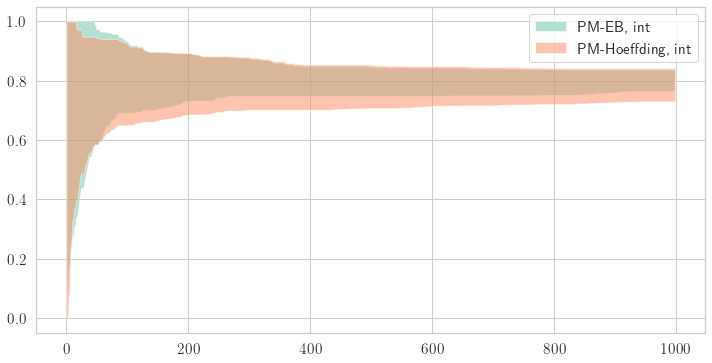

In [86]:
# plt.fill_between(x=np.arange(n),y1=np.maximum(low,0),y2=np.minimum(up,1),alpha=0.5, label='PM-EB')
# plt.fill_between(x=np.arange(n),y1=np.maximum(low_h,0),y2=np.minimum(up_h,1),alpha=0.5, label='PM-Hoeffding')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_int, 0),
                 y2=np.minimum(up_int, 1),
                 alpha=0.5,
                 label='PM-EB, int')
plt.fill_between(x=np.arange(n),
                 y1=np.maximum(low_h_int, 0),
                 y2=np.minimum(up_h_int, 1),
                 alpha=0.5,
                 label='PM-Hoeffding, int')
plt.legend()
#plt.ylim([0,0.4])